In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import torch
import pickle

In [2]:
l1, l2, l3 = 0.5, 0.5, 1.
def x_gen():
    x1 = np.random.normal(0,0.25, (1))
    x2_4 = np.random.normal(0,0.5, (3))
    x = np.concatenate((x1, x2_4))
    y1 = l1*np.cos(x[1])+l2*np.cos(x[2]-x[1])+l3*np.cos(x[3]-x[2]-x[1])
    y2 = x[0]+l1*np.sin(x[1])+l2*np.sin(x[2]-x[1])+l3*np.sin(x[3]-x[2]-x[1])
    return np.array(x), np.array([y1, y2])

In [3]:
X_tensor = pickle.load(open('/home/anna/uni/inverse/final_project/kinematic/X_tensor', 'rb'))
Y_tensor = pickle.load(open('/home/anna/uni/inverse/final_project/kinematic/Y_tensor', 'rb'))

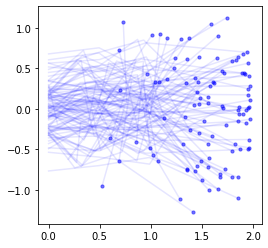

In [4]:
plt.figure(figsize=(4,4))
for i in range(100):
    x1, x2, x3, x4 = X_tensor[i]
    y1, y2 = Y_tensor[i]
    plt.plot([0, l1*np.cos(x2), l1*np.cos(x2)+l2*np.cos(x3-x2), l1*np.cos(x2)+l2*np.cos(x3-x2)+l3*np.cos(x4-x3-x2)], [x1, x1+l1*np.sin(x2),x1+l1*np.sin(x2)+l2*np.sin(x3-x2), x1+l1*np.sin(x2)+l2*np.sin(x3-x2)+l3*np.sin(x4-x3-x2)], 'b', alpha=0.1)
    plt.scatter(y1, y2, c='b', s=10, alpha=0.5)
plt.show()

In [5]:
X_numpy = X_tensor.numpy()
Y_numpy = Y_tensor.numpy()

In [6]:
Y_test = Y_numpy[:9]

In [7]:
# Y_relate = {y1:0, y2:2, y3:3, y4:4, y5:5, y6:6, y7:7, y8:8, y9:9}

In [8]:
Y = {y:[] for y in range(9)}
X = {y:[] for y in range(9)}
generated = np.array([len(Y[y]) for y in range(9)])

In [9]:
def dist(x,y):
    r = x-y
    return np.sqrt(r[0]**2+r[1]**2)

epsilon = 0.005
t_start = time()
j=1


while (generated<100).any():
    generated = np.array([len(Y[y]) for y in range(9)])
    if j%1000==0:
        print('j = ', j, ', acumulated: ', generated)
        j+=1
    x, y = x_gen()
    for i in range(9):       
        if dist(y, Y_test[i])<epsilon:
            Y[i].append(y)
            X[i].append(x)
            j+=1
print('ABC training took: ', str(round((time()-t_start)//60, 2)), 'mins')

j =  1000 , acumulated:  [147  19  34 298  38  54 112 268  29]
j =  2000 , acumulated:  [315  39  71 580  70 102 231 531  59]
j =  3000 , acumulated:  [473  73 119 877  98 148 333 789  87]
j =  4000 , acumulated:  [ 647   90  164 1161  127  194  444 1053  116]
ABC training took:  7.0 mins


In [10]:
generated

array([ 746,  100,  188, 1347,  158,  224,  518, 1201,  136])

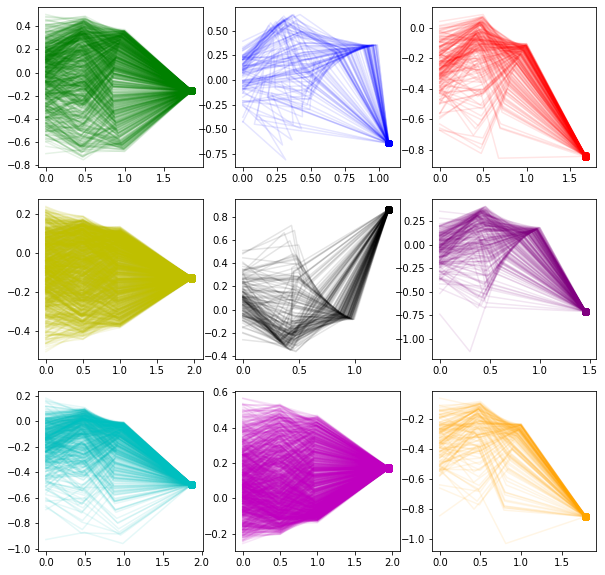

In [11]:
colors = color={0:'g', 1:'b', 2:'r', 3:'y', 4:'k', 5:'purple', 6:'c', 7:'m', 8:'orange', 9:'brown'} 
fig = plt.figure(figsize=(10,10))
for i in range(9):
    X_y1 = np.array(X[i])
    X1, X2, X3, X4 = X_y1[:, 0], X_y1[:, 1], X_y1[:, 2], X_y1[:, 3]
    Y1_g = np.concatenate((np.zeros((X1.size, 1)), np.expand_dims(l1*np.cos(X2), 1), np.expand_dims(l1*np.cos(X2)+l2*np.cos(X3-X2), 1), np.expand_dims(l1*np.cos(X2)+l2*np.cos(X3-X2)+l3*np.cos(X4-X3-X2), 1)), 1)
    Y2_g = np.concatenate((np.expand_dims(X1, 1), np.expand_dims(X1+l1*np.sin(X2), 1), np.expand_dims(X1+l1*np.sin(X2)+l2*np.sin(X3-X2), 1), np.expand_dims(X1+l1*np.sin(X2)+l2*np.sin(X3-X2)+l3*np.sin(X4-X3-X2), 1)), 1)
    Y_y1 = np.array(Y[i])
    Y1, Y2= Y_y1[:, 0], Y_y1[:, 1]
    plt.subplot(3,3,i+1)
    for j in range(X1.size):
        plt.plot(Y1_g[j], Y2_g[j], c=colors[i], alpha=0.1)
        plt.scatter(Y1[j], Y2[j], c=colors[i])
plt.show()